<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Probability


<br>

### After this Chapter you will be able to:
* Compute and understand Random variable
* Compute and understand Intersection, union, independency
* Compute and understand Conditional probability
<br>
<br>
<br>

### Exercise (Trading):
* Apply conditional probability to stock market 





<br>
<br>

💰Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 5.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install ta

  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=2bfd045699199b5540345dba78ce79a96ab7fe694e2722e029fc37b50cd68281
  Stored in directory: /root/.cache/pip/wheels/7e/da/86/65cba22446ae2ef148de2079907264ef27feecfb7f51a45e0d
Successfully built ta


In [ ]:
!pip install scipy==1.7.1

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

In [ ]:
# Import the data and create variations of GOOGLE
df = yf.download("GOOG")[["Adj Close"]].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019
...,...
2021-12-13,-0.013254
2021-12-14,-0.011820
2021-12-15,0.016541


# Probability

In [ ]:
# Compute the chance of a increase
p_increase = len(df[df["Adj Close"]>0])/len(df)*100

# Compute the chance of a decrease
p_decrease = len(df[df["Adj Close"]<0])/len(df)*100

# %Increase + %Descrease close to one but not mandatory equal 1
print(f"Weights| \t Increase: {'%.2f' % p_increase} \t Decrease: {'%.2f' % p_decrease}")

Weights| 	 Increase: 52.66 	 Decrease: 47.32


# Conditional Probability

In [ ]:
# Bollinger Band class
from ta.volatility import BollingerBands

In [ ]:
# Import "Stationary" data

# Import close price
df = yf.download("EURUSD=X")[["Adj Close"]]

# Create the returns
df["return"] = df["Adj Close"].pct_change(1).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Initialize BB class
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

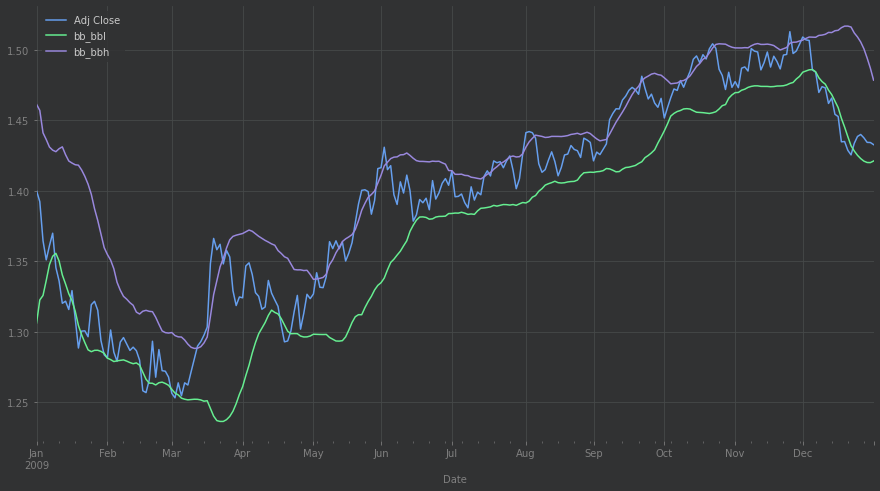

In [ ]:
df[['Adj Close', 'bb_bbl', 'bb_bbh']].loc["2009"].plot(figsize=(15,8))

In [ ]:
# Import close price
df = yf.download("ETH-USD")[["Adj Close"]]

# Create the returns
df["return"] = df["Adj Close"].pct_change(1).dropna()

# Initialize BB class
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()


# Shift the values
df["Adj Close Yesterday"] = df["Adj Close"].shift(1)
df["bbh Yesterday"] = df["bb_bbh"].shift(1)

# Drop the row containing missing values
df = df.dropna()


# Variable initialization
n = 10
dates = []
returns = []

# 
for i in range(len(df)-n-1):
  row = df.iloc[i:i+1,:]
  
  # Create signal conbdition
  if (row["Adj Close Yesterday"].values[0] < row["bbh Yesterday"].values[0]) and\
  (row["Adj Close"].values[0] > row["bb_bbh"].values[0]):
    
    # Save the date
    dates.append(row.index[0])
    
    # Compute the returns from signal to 10days later 
    ret = []
    for day in range(1,n):
      ret.append(df.iloc[i+day:i+1+day,:]["return"].values[0])
    returns.append(ret)

# List of lists to dataframe
df_returns = pd.DataFrame(returns).cumsum(axis=1)

[*********************100%***********************]  1 of 1 completed


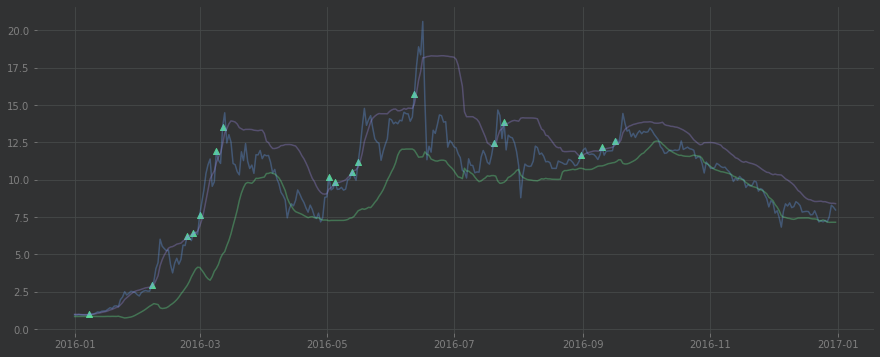

In [ ]:
# We plot all the signl to be sure that they be correct

# Select all signal in a index list to plot only this points
idx = dates
year="2016"

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the open long signal in green
plt.scatter(df.loc[idx].loc[year].index, df.loc[idx]["Adj Close"].loc[year], color= "#57CE95", marker="^")

# Plot the points of the close long signal in blue

# Plot the rsi to be sure that the conditions are completed
plt.plot(df["Adj Close"].loc[year].index, df["Adj Close"].loc[year], alpha=0.35)
plt.plot(df["bb_bbl"].loc[year].index, df["bb_bbl"].loc[year], alpha=0.35)
plt.plot(df["bb_bbh"].loc[year].index, df["bb_bbh"].loc[year], alpha=0.35)



# Show the graph
plt.show()

In [ ]:
# Compute %Increase %Decrease of returns from signal to 10days later
for i in range(n-1):
  g = df_returns.iloc[:,i:i+1].values
  p_increase = len(g[g>0])/len(g)*100
  p_decrease = len(g[g<0])/len(g)*100

  print(f"Weights day {i+1}| \t Increase: {'%.2f' % p_increase} %\t Decrease: {'%.2f' % p_decrease} %")
print(f" ")

# Compute %Increase %Decrease of the asset on all the situations
p_increase = len(df[df["return"]>0])/len(df)*100
p_decrease = len(df[df["return"]<0])/len(df)*100
print(f"Weights| \t Increase: {'%.2f' % p_increase} % \t Decrease: {'%.2f' % p_decrease} % ")

Weights day 1| 	 Increase: 57.66 %	 Decrease: 42.34 %
Weights day 2| 	 Increase: 57.66 %	 Decrease: 42.34 %
Weights day 3| 	 Increase: 70.27 %	 Decrease: 29.73 %
Weights day 4| 	 Increase: 66.67 %	 Decrease: 33.33 %
Weights day 5| 	 Increase: 69.37 %	 Decrease: 30.63 %
Weights day 6| 	 Increase: 70.27 %	 Decrease: 29.73 %
Weights day 7| 	 Increase: 72.07 %	 Decrease: 27.93 %
Weights day 8| 	 Increase: 70.27 %	 Decrease: 29.73 %
Weights day 9| 	 Increase: 71.17 %	 Decrease: 28.83 %
 
Weights| 	 Increase: 51.24 % 	 Decrease: 48.76 % 


In [ ]:
dft = df["Adj Close"].pct_change(n).dropna()

# Compute %Increase %Decrease of the asset on all the situations
p_increase = len(dft[dft>0])/len(dft)*100
p_decrease = len(dft[dft<0])/len(dft)*100
print(f"Weights| \t Increase: {'%.2f' % p_increase} % \t Decrease: {'%.2f' % p_decrease} % ")

Weights| 	 Increase: 57.30 % 	 Decrease: 42.70 % 


# Hypothesis test (This part comes with chapter "Hypothesis test". Don't read it before if you are not confortable with them)

In [ ]:
import scipy
scipy.__version__

'1.7.1'

In [ ]:
from scipy.stats import ttest_ind

# H0: RETURN_bollinger ≤ RETURN_normal
# H1: RETURN_bollinger > RETURN_normal
# Alpha: 0.05=5%

p = ttest_ind(dft, df_returns.iloc[:,-1].values,alternative="less").pvalue
print(f"H0: Strategy returns ≤ Random returns \t p_value: {np.round(p*100,2)} %")

H0: Strategy returns ≤ Random returns 	 p_value: 0.8 %


We have a p value of ***0.8%***. It means that there is 0.8% chance that the mean of the strategy return is inferior or equal to the mean of return. So, we can reject H0.